# St Jude DNA-Nexus pediatric tumor data analysis and comparison to EPICYCLE RMS data

05/09/2025 Marvin Jens

This notebook details how the StJude RNA-seq data were imported and preprocessed. The metadata and featurecounts files themselves were seperately downloaded from St Jude's DNAnexus using commandline tools. These files belong to St Jude and are not shared here.

In [1]:
import pandas as pd
import scanpy as sc
import seaborn as sns
import os

meta = pd.read_csv("../stjude/SAMPLE_INFO.txt.gz", sep="\t").set_index("sample_name")

In [2]:
meta.head()

,file_path,file_id,subject_name,sample_type,sequencing_type,file_type,description,file_size,sj_dataset_accessions,sj_embargo_date,...,sj_ega_accessions,sj_access_unit,sj_diseases,sj_datasets,sj_pipeline_name,sj_pipeline_version,attr_tissue_preservative,attr_lab_strandedness,sj_disease_hierarchy_code,sj_disease_hierarchy_name
sample_name,,,,,,,,,,,,,,,,,,,,,
SJACT030424_D1,/FEATURE_COUNTS/SJACT030424_D1.RNA-Seq.feature...,file-FqP7v5896ZJyKg9jPxg209V9,SJ030424,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,705774,SJC-DS-1007,Mar-01-2020,...,-,UnrestrictedData,ACC,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,FFPE,Stranded-Reverse,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...
SJACT030437_D1,/FEATURE_COUNTS/SJACT030437_D1.RNA-Seq.feature...,file-FqP7y8Q96ZJxzpbqBkxPFzBx,SJ030437,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,682926,SJC-DS-1007,Mar-01-2020,...,-,UnrestrictedData,ACC,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,FFPE,Stranded-Reverse,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...
SJACT030487_D1,/FEATURE_COUNTS/SJACT030487_D1.RNA-Seq.feature...,file-FqP7yB096ZJxzpbqBkxPFzBz,SJ030487,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,678042,SJC-DS-1007,Mar-01-2020,...,-,UnrestrictedData,ACC,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,FFPE,Stranded-Reverse,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...
SJALCL031066_D1,/FEATURE_COUNTS/SJALCL031066_D1.RNA-Seq.featur...,file-FqP7yGj96ZJXzXGx8fzKPZFP,SJ031066,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,669738,SJC-DS-1007,Apr-01-2020,...,-,UnrestrictedData,ALCL,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,Fresh/Frozen,Stranded-Reverse,HM|LYMPH|NHL|ALCL,Hematologic Malignancy|Lymphoid Neoplasm|Non-H...
SJAML030210_D2,/FEATURE_COUNTS/SJAML030210_D2.RNA-Seq.feature...,file-FqP7yK896ZJyKg9jPxg209kK,SJ030210,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,668933,SJC-DS-1007;SJC-DS-1015,Apr-01-2020,...,-,UnrestrictedData,AMLKMT2A,Real-time Clinical Genomics (RTCG);Genomics an...,RNA-Seq Standard,2.0.0,Fresh/Frozen,Stranded-Reverse,HM|MYEL|AML|AMLKMT2A,Hematologic Malignancy|Myeloid Neoplasm|Acute ...


In [4]:
sample_files = {}
for row in meta[["file_id", "file_path"]].drop_duplicates().itertuples():
    #print(row)
    fname = os.path.basename(row.file_path)
    sample_files[row.Index] = fname
    if not os.access(f"../stjude/{fname}.gz", os.R_OK):
        print(f"need to download {row.file_id} -> {fname}")
#        os.system(f"dx download {row.file_id}")
    else:
        print(f"file exists: {fname}")

file exists: SJACT030424_D1.RNA-Seq.feature-counts.txt
file exists: SJACT030437_D1.RNA-Seq.feature-counts.txt
file exists: SJACT030487_D1.RNA-Seq.feature-counts.txt
file exists: SJALCL031066_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030210_D2.RNA-Seq.feature-counts.txt
file exists: SJACT030812_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030416_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030430_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030601_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030612_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030683_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030440_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030592_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030361_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030464_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030454_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030560_D1.RNA-Seq.feature-counts.txt
file exists: SJAML030547_D1.RNA-Seq.feature-counts.txt
file exis

In [5]:
data = []
for sample, fname in sample_files.items():
    data.append(pd.read_csv(f"../stjude/{fname}.gz", sep='\t', names=['gene', sample]).set_index('gene'))
    print(f"loaded {len(data)} {fname}")


loaded 1 SJACT030424_D1.RNA-Seq.feature-counts.txt
loaded 2 SJACT030437_D1.RNA-Seq.feature-counts.txt
loaded 3 SJACT030487_D1.RNA-Seq.feature-counts.txt
loaded 4 SJALCL031066_D1.RNA-Seq.feature-counts.txt
loaded 5 SJAML030210_D2.RNA-Seq.feature-counts.txt
loaded 6 SJACT030812_D1.RNA-Seq.feature-counts.txt
loaded 7 SJAML030416_D1.RNA-Seq.feature-counts.txt
loaded 8 SJAML030430_D1.RNA-Seq.feature-counts.txt
loaded 9 SJAML030601_D1.RNA-Seq.feature-counts.txt
loaded 10 SJAML030612_D1.RNA-Seq.feature-counts.txt
loaded 11 SJAML030683_D1.RNA-Seq.feature-counts.txt
loaded 12 SJAML030440_D1.RNA-Seq.feature-counts.txt
loaded 13 SJAML030592_D1.RNA-Seq.feature-counts.txt
loaded 14 SJAML030361_D1.RNA-Seq.feature-counts.txt
loaded 15 SJAML030464_D1.RNA-Seq.feature-counts.txt
loaded 16 SJAML030454_D1.RNA-Seq.feature-counts.txt
loaded 17 SJAML030560_D1.RNA-Seq.feature-counts.txt
loaded 18 SJAML030547_D1.RNA-Seq.feature-counts.txt
loaded 19 SJAML030459_D1.RNA-Seq.feature-counts.txt
loaded 20 SJAML03047

In [6]:
df = pd.concat(data, axis=1)

In [7]:
df.head()

,SJACT030424_D1,SJACT030437_D1,SJACT030487_D1,SJALCL031066_D1,SJAML030210_D2,SJACT030812_D1,SJAML030416_D1,SJAML030430_D1,SJAML030601_D1,SJAML030612_D1,...,SJAML007124_D1,SJAML074191_D1,SJAML074192_D1,SJAML074193_D1,SJAML074194_D1,SJAML074195_D1,SJAML074196_D1,SJAML074197_D2,SJMLL001_D,SJMLL002_D
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,61,24,1,6,0,1,19,9,19,26,...,55,61,51,56,7,20,91,8,80,179
A1BG-AS1,101,249,31,91,6,13,232,58,55,177,...,227,495,366,289,109,131,535,21,732,334
A1CF,212,0,0,0,10,0,0,0,3,1,...,0,3,0,0,0,0,0,83,3,0
A2M,3618,29688,3033,1713,1650,7528,68,18,138,175,...,10,101,127,3,99,202,0,1483,48,23
A2M-AS1,119,129,149,91,24,218,192,22,256,103,...,4,647,244,13,85,5,78,24,60,11


In [8]:
df.to_csv('../data/stjude_count_matrix.tsv.gz', sep='\t')

## Convert count x gene matrix to scanpy adata

The `AnnData` object allows to store the various pre-processing stages as `.layer` attributes, to have per-sample metadata in `.obs` and enables the use of the scanpy tools for pre-proccessing, dimensionality reduction, visualization etc. So why not use it here?

### We start with the St Jude data

In [10]:
import scanpy as sc

In [18]:
sj = pd.read_csv('../data/stjude_count_matrix.tsv.gz', sep='\t').set_index('gene')

In [19]:
sj

,SJACT030424_D1,SJACT030437_D1,SJACT030487_D1,SJALCL031066_D1,SJAML030210_D2,SJACT030812_D1,SJAML030416_D1,SJAML030430_D1,SJAML030601_D1,SJAML030612_D1,...,SJAML007124_D1,SJAML074191_D1,SJAML074192_D1,SJAML074193_D1,SJAML074194_D1,SJAML074195_D1,SJAML074196_D1,SJAML074197_D2,SJMLL001_D,SJMLL002_D
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,61,24,1,6,0,1,19,9,19,26,...,55,61,51,56,7,20,91,8,80,179
A1BG-AS1,101,249,31,91,6,13,232,58,55,177,...,227,495,366,289,109,131,535,21,732,334
A1CF,212,0,0,0,10,0,0,0,3,1,...,0,3,0,0,0,0,0,83,3,0
A2M,3618,29688,3033,1713,1650,7528,68,18,138,175,...,10,101,127,3,99,202,0,1483,48,23
A2M-AS1,119,129,149,91,24,218,192,22,256,103,...,4,647,244,13,85,5,78,24,60,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
__no_feature,117437699,33112204,25828240,11134565,6968508,27922870,21869145,17690955,23999571,53583169,...,40342858,31821742,25116818,21935626,20711315,30102386,37251090,41253042,70638683,23215487
__ambiguous,579021,2284705,1529835,1131378,8086196,3299238,5460481,2074964,4142913,3806144,...,7057651,5537865,9978398,9876318,10461943,10743837,7964869,1435214,12150326,489719
__too_low_aQual,1318,0,1,264,1839,455,0,264,281,5,...,0,0,0,0,0,0,0,0,0,0


In [20]:
ad_sj = sc.AnnData(sj.T) # st Jude data
ad_sj.var_names_make_unique()

In [21]:
meta.head()

,file_path,file_id,subject_name,sample_type,sequencing_type,file_type,description,file_size,sj_dataset_accessions,sj_embargo_date,...,sj_ega_accessions,sj_access_unit,sj_diseases,sj_datasets,sj_pipeline_name,sj_pipeline_version,attr_tissue_preservative,attr_lab_strandedness,sj_disease_hierarchy_code,sj_disease_hierarchy_name
sample_name,,,,,,,,,,,,,,,,,,,,,
SJACT030424_D1,/FEATURE_COUNTS/SJACT030424_D1.RNA-Seq.feature...,file-FqP7v5896ZJyKg9jPxg209V9,SJ030424,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,705774,SJC-DS-1007,Mar-01-2020,...,-,UnrestrictedData,ACC,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,FFPE,Stranded-Reverse,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...
SJACT030437_D1,/FEATURE_COUNTS/SJACT030437_D1.RNA-Seq.feature...,file-FqP7y8Q96ZJxzpbqBkxPFzBx,SJ030437,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,682926,SJC-DS-1007,Mar-01-2020,...,-,UnrestrictedData,ACC,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,FFPE,Stranded-Reverse,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...
SJACT030487_D1,/FEATURE_COUNTS/SJACT030487_D1.RNA-Seq.feature...,file-FqP7yB096ZJxzpbqBkxPFzBz,SJ030487,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,678042,SJC-DS-1007,Mar-01-2020,...,-,UnrestrictedData,ACC,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,FFPE,Stranded-Reverse,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...
SJALCL031066_D1,/FEATURE_COUNTS/SJALCL031066_D1.RNA-Seq.featur...,file-FqP7yGj96ZJXzXGx8fzKPZFP,SJ031066,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,669738,SJC-DS-1007,Apr-01-2020,...,-,UnrestrictedData,ALCL,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,Fresh/Frozen,Stranded-Reverse,HM|LYMPH|NHL|ALCL,Hematologic Malignancy|Lymphoid Neoplasm|Non-H...
SJAML030210_D2,/FEATURE_COUNTS/SJAML030210_D2.RNA-Seq.feature...,file-FqP7yK896ZJyKg9jPxg209kK,SJ030210,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,668933,SJC-DS-1007;SJC-DS-1015,Apr-01-2020,...,-,UnrestrictedData,AMLKMT2A,Real-time Clinical Genomics (RTCG);Genomics an...,RNA-Seq Standard,2.0.0,Fresh/Frozen,Stranded-Reverse,HM|MYEL|AML|AMLKMT2A,Hematologic Malignancy|Myeloid Neoplasm|Acute ...


In [22]:
# copy st Jude metadata columns
for c in ['sample_type', 'sj_diseases', 'sj_disease_hierarchy_code', 'sj_disease_hierarchy_name']:
    # St Jude data contain some duplicate entries. Need to get rid of them...
    m = meta.loc[ad_sj.obs_names, c].reset_index().drop_duplicates().set_index('index')
    ad_sj.obs[c] = m

In [23]:
ad_sj.obs['RMS_type'] = ad_sj.obs['sj_diseases'].apply(lambda x: x if 'RMS' in x else 'non-RMS')

In [24]:
ad_sj.obs['RMS_type'].value_counts()

RMS_type
non-RMS    5130
ERMS         68
ARMS         49
RMSNOS       30
SCRMS         6
BERMS         5
SCSRMS        4
Name: count, dtype: int64

In [25]:
# There is an excessive amount of non-RMS in the collection. Let's restrict to 
# other *soft-tissue* samples that are not RMS as 'non-RMS' control

ad_sj.obs['tissue'] = ad_sj.obs['sj_disease_hierarchy_code'].apply(lambda x: x.split('|')[0])
ad_sj[ad_sj.obs['tissue'] == 'ST'].obs['RMS_type'].value_counts()

RMS_type
non-RMS    1049
ERMS         68
ARMS         49
RMSNOS       30
SCRMS         6
BERMS         5
SCSRMS        4
Name: count, dtype: int64

In [26]:
# Yes. Much better. Let's go with that.
ad_sj = ad_sj[ad_sj.obs['tissue'] == 'ST']

### And also load our own (EPICYCLE) RNA-seq data

In [28]:
#ec = pd.read_csv("/home/marjens/cubi_home/work/guenther_rms/results/length_corrected.counts.csv", sep='\t').set_index('gene')
ec = pd.read_csv("../data/RMS_read_counts.csv.gz", sep='\t').set_index('gene')

In [29]:
ec

,IC35.r1,IC35.r2,X16.r1,X16.r2,IC104.r1,IC104.r2,BE14.r1,BE14.r2,R410.r1,R410.r2,IC29.r1,IC29.r2,BE13.r1,BE13.r2,X1.r1,X1.r2,ZH3.r1,ZH3.r2,Be10.r1,Be10.r2
gene,,,,,,,,,,,,,,,,,,,,
DDX11L1,0,0,0,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0,0,0
WASH7P,100,83,82,94,86,69,128,138,63,67,142,126,96,151,103,84,148,148,96,105
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OR4G4P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,23061,24249,34813,28265,40781,53701,39398,39379,17686,22390,35828,35302,23139,29240,33130,33914,30496,29335,28493,29702
MT-TE,115,160,196,151,227,530,363,397,58,83,210,166,151,146,591,458,177,153,339,209
MT-CYB,60967,74060,88714,78380,185368,126173,134356,149008,82047,114747,134526,136181,122437,158402,78045,82260,111963,112423,104292,120803


In [30]:
ad_ec = sc.AnnData(ec.T) # EpiCycle data
ad_ec.var_names_make_unique()

/home/marjens/miniconda3/envs/jup/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/marjens/miniconda3/envs/jup/lib/python3.12/site-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-5', 'SNORD116-6']
  warnings.warn(


### Combine StJude and EPICYCLE data into one adata object

In [31]:
common = sorted(set(ad_sj.var_names.to_list()) & set(ad_ec.var_names.to_list()))

In [32]:
ad_sj.obs['source'] = 'stjude'
ad_ec.obs['source'] = 'epicycle'

/tmp/ipykernel_1529713/979805778.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad_sj.obs['source'] = 'stjude'


In [33]:
ad_ec.obs['sample_type'] = 'pdx'
ad_ec.obs['RMS_type'] = 'this_study'
ad_ec.obs['tissue'] = 'ST'

In [34]:
ad_sj.obs

,sample_type,sj_diseases,sj_disease_hierarchy_code,sj_disease_hierarchy_name,RMS_type,tissue,source
SJACT030424_D1,Diagnosis,ACC,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...,non-RMS,ST,stjude
SJACT030437_D1,Diagnosis,ACC,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...,non-RMS,ST,stjude
SJACT030487_D1,Diagnosis,ACC,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...,non-RMS,ST,stjude
SJACT030812_D1,Diagnosis,ACC,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...,non-RMS,ST,stjude
SJDSRCT030722_D1,Diagnosis,DSRCT,ST|STIS|NRSTT|DSRCT,Solid Tumor|Soft Tissue|Non-Rhabdomyosarcoma S...,non-RMS,ST,stjude
...,...,...,...,...,...,...,...
SJNBL034296_D2,Diagnosis,GNBL,ST|PNS|GNBL,Solid Tumor|Peripheral Nervous System|Ganglion...,non-RMS,ST,stjude
SJST034409_D1,Diagnosis,PGNG,ST|STIS|NRSTT|PGNG,Solid Tumor|Soft Tissue|Non-Rhabdomyosarcoma S...,non-RMS,ST,stjude
SJBALL030448_D3,Diagnosis,LPM,ST|STIS|NRSTT|LPM,Solid Tumor|Soft Tissue|Non-Rhabdomyosarcoma S...,non-RMS,ST,stjude
SJOS034364_D1,Diagnosis,OS,ST|BONE|OS,Solid Tumor|Bone|Osteosarcoma,non-RMS,ST,stjude


In [35]:
ad = sc.concat([ad_sj[ad_sj.obs['tissue'] == 'ST', common], ad_ec[:, common]])

### Standard, per-sample pre-processing

We can use the scanpy functions for standard normalization (counts-per-million), and log-transformatino (log1p).
Highly variable genes may be useful later on, so let's identify them (this does not subset the genes, it only adds `.var['highly_variable']`).

In [36]:
ad.layers['raw_counts'] = ad.X.copy()

In [37]:
sc.pp.normalize_total(ad, target_sum=1E6)

In [38]:
ad.layers['normed'] = ad.X.copy()

In [39]:
sc.pp.log1p(ad)
ad.layers['log1p'] = ad.X.copy()

In [40]:
sc.pp.highly_variable_genes(ad, n_top_genes=3000, flavor='cell_ranger')

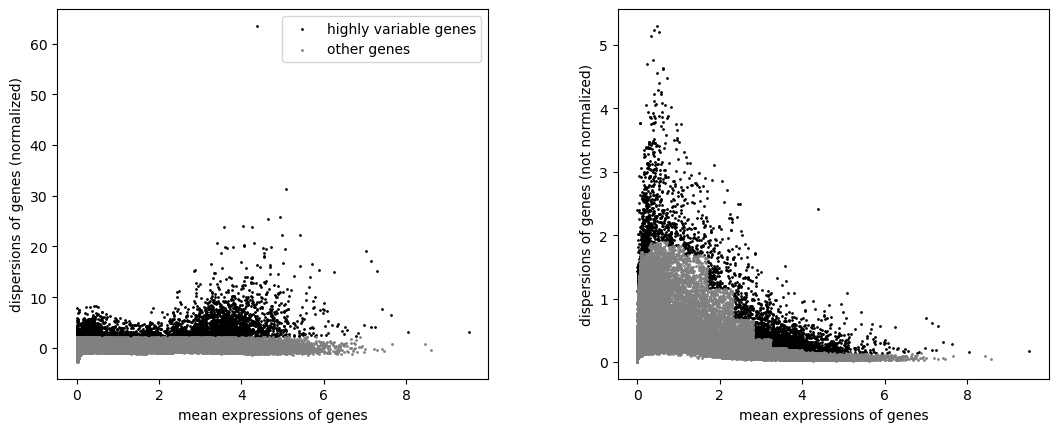

In [41]:
sc.pl.highly_variable_genes(ad)

In [ ]:
# save some space
import numpy as np
ad.layers['raw_counts'] = np.array(ad.layers['raw_counts'], dtype=np.int32)

In [49]:
ad.write_h5ad('../data/st_jude_and_epicycle_adata.h5ad')